Notebook based on work by [Software Carpentry](https://github.com/swcarpentry/2013-04-az/blob/master/notebooks/10-introducing-bird-counting-FULL.ipynb).
Updated by David Koop, 9/10/2015. Data files available here: [birds-small.csv](http://www.cis.umassd.edu/~dkoop/cis602-2015fa/birds-small.csv), [birds.csv](http://www.cis.umassd.edu/~dkoop/cis602-2015fa/birds.csv)

In [1]:
%cat birds-small.csv

In [6]:
f = open('birds-small.csv', 'r')
for line in f:
    print(line.strip().split(','))

['common teal', 'new york', 'june 30']
['little grebe', 'michigan', 'may 15']
['bald eagle', 'michigan', 'june 09']
['common teal', 'kansas', 'may 24']
['albatross', 'new york', 'july 22']
['common teal', 'michigan', 'june 24']
['shoebill', 'missouri', 'august 07']
['little grebe', 'michigan', 'august 01']
['common teal', 'kansas', 'july 29']
['long-tailed duck', 'missouri', 'may 07']
['flamingo', 'new york', 'june 30']
['heron', 'new york', 'may 05']
['shoebill', 'kansas', 'june 28']
['little grebe', 'maine', 'august 02']
['bald eagle', 'kansas', 'june 16']
['albatross', 'maine', 'june 14']


In [11]:
f = open('birds.csv', 'r')
for (i, line) in enumerate(f):
    print(line.strip())
    # print(line.strip().split(','))
    if i > 20:
        break

common teal,new york,june 30
little grebe,michigan,may 15
bald eagle,michigan,june 09
common teal,kansas,may 24
albatross,new york,july 22
common teal,michigan,june 24
shoebill,missouri,august 07
little grebe,michigan,august 01
common teal,kansas,july 29
long-tailed duck,missouri,may 07
flamingo,new york,june 30
"canada goose, lesser",new york,may 05
shoebill,kansas,june 28
little grebe,maine,august 02
bald eagle,kansas,june 16
albatross,maine,june 14
bald eagle,kentucky,august 17
stork,new york,september 02
long-tailed duck,missouri,june 20
albatross,michigan,may 23
stork,michigan,september 05
shoebill,maine,july 14


In [14]:
import csv
data = []
with open("birds.csv", "rU") as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)

In [15]:
data[:10]

[['common teal', 'new york', 'june 30'],
 ['little grebe', 'michigan', 'may 15'],
 ['bald eagle', 'michigan', 'june 09'],
 ['common teal', 'kansas', 'may 24'],
 ['albatross', 'new york', 'july 22'],
 ['common teal', 'michigan', 'june 24'],
 ['shoebill', 'missouri', 'august 07'],
 ['little grebe', 'michigan', 'august 01'],
 ['common teal', 'kansas', 'july 29'],
 ['long-tailed duck', 'missouri', 'may 07']]

In [18]:
# count all unique birds
species = set()
for row in data:
    species.add(row[0])
len(species)
print(species)

{'little grebe', 'canada goose, lesser', 'common teal', 'bald eagle', 'flamingo', 'shoebill', 'vulture', 'albatross', 'long-tailed duck', 'stork'}


In [20]:
other_birds = {"cardinal", "nightengale", "common teal"}

In [21]:
species.union(other_birds)

{'albatross',
 'bald eagle',
 'canada goose, lesser',
 'cardinal',
 'common teal',
 'flamingo',
 'little grebe',
 'long-tailed duck',
 'nightengale',
 'shoebill',
 'stork',
 'vulture'}

In [23]:
other_birds.intersection(species)

{'common teal'}

In [26]:
# count number of birds of each species seen in each state
birds = {}
for row in data:
    [bird, state, date] = row
    # row = [bird, state, date] 
    if bird not in birds:
        birds[bird] = {}
    if state not in birds[bird]:
        birds[bird][state] = 1
    else:
        birds[bird][state] += 1
# print(birds)
for (bird, states) in birds.items():
    print(bird)
    for (state, count) in states.items():
        print(' ', state, count)

little grebe
  missouri 146
  michigan 154
  kentucky 155
  kansas 168
  new york 160
  maine 171
albatross
  kansas 169
  missouri 149
  michigan 158
  kentucky 166
  new york 186
  maine 145
long-tailed duck
  kansas 158
  michigan 177
  missouri 168
  kentucky 161
  new york 164
  maine 157
bald eagle
  kansas 175
  missouri 161
  michigan 186
  kentucky 160
  new york 169
  maine 177
canada goose, lesser
  kentucky 159
  michigan 159
  missouri 135
  kansas 165
  new york 157
  maine 171
stork
  kansas 160
  missouri 187
  michigan 175
  kentucky 172
  new york 182
  maine 182
shoebill
  kentucky 158
  michigan 178
  missouri 170
  kansas 161
  new york 146
  maine 164
common teal
  kansas 192
  michigan 175
  missouri 160
  kentucky 183
  new york 176
  maine 158
flamingo
  kentucky 179
  michigan 174
  missouri 183
  kansas 196
  new york 155
  maine 183
vulture
  kansas 159
  missouri 160
  michigan 166
  kentucky 162
  new york 156
  maine 162


In [27]:
len(data)

10000

In [31]:
ny_birds = []
for bird, states in birds.items():
    ny_birds.append((bird, states["new york"]))
ny_birds

[('little grebe', 160),
 ('albatross', 186),
 ('long-tailed duck', 164),
 ('bald eagle', 169),
 ('canada goose, lesser', 157),
 ('stork', 182),
 ('shoebill', 146),
 ('common teal', 176),
 ('flamingo', 155),
 ('vulture', 156)]

In [32]:
ny_birds_d = dict(ny_birds)

In [33]:
ny_birds_d

{'albatross': 186,
 'bald eagle': 169,
 'canada goose, lesser': 157,
 'common teal': 176,
 'flamingo': 155,
 'little grebe': 160,
 'long-tailed duck': 164,
 'shoebill': 146,
 'stork': 182,
 'vulture': 156}

In [34]:
ny_birds_d["stork"]

182

In [45]:
min(x[1] for x in ny_birds)

146

In [73]:
sorted(ny_birds_d.items(), key=lambda x: x[1])

[('shoebill', 146),
 ('flamingo', 155),
 ('vulture', 156),
 ('canada goose, lesser', 157),
 ('little grebe', 160),
 ('long-tailed duck', 164),
 ('bald eagle', 169),
 ('common teal', 176),
 ('stork', 182),
 ('albatross', 186)]

In [52]:
from datetime import datetime
datetime.strptime('may 21 2014', '%B %d %Y')

datetime.datetime(2014, 5, 21, 0, 0)

In [54]:
count_by_day = {}
for row in data:
    [bird, state, date_str] = row
    date = datetime.strptime(date_str + " 2014", '%B %d %Y')
    day_of_year = int(date.strftime("%j"))
    count_by_day[day_of_year] = \
        count_by_day.get(day_of_year,0) + 1

In [58]:
(days, counts) = list(zip(*count_by_day.items()))

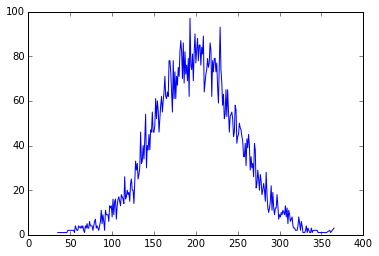

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(days, counts)

In [60]:
import pandas as pd

In [61]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', dialect=None, compression='infer', doublequote=True, escapechar=None, quotechar='"', quoting=0, skipinitialspace=False, lineterminator=None, header='infer', index_col=None, names=None, prefix=None, skiprows=None, skipfooter=None, skip_footer=0, na_values=None, na_fvalues=None, true_values=None, false_values=None, delimiter=None, converters=None, dtype=None, usecols=None, engine=None, delim_whitespace=False, as_recarray=False, na_filter=True, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, warn_bad_lines=True, error_bad_lines=True, keep_default_na=True, thousands=None, comment=None, decimal=b'.', parse_dates=False, keep_date_col=False, dayfirst=False, date_parser=None, memory_map=False, float_precision=None, nrows=None, iterator=False, chunksize=None, verbose=False, encoding=None, squeeze=False, mangle_dupe_cols=True, tupleize_cols=False, infer_datetime_format=False,

In [64]:
df = pd.read_csv("birds.csv", header=None, names=["bird", "state", "date"])

In [69]:
df.columns.values

array(['bird', 'state', 'date'], dtype=object)

In [70]:
pd.unique(df.bird)

array(['common teal', 'little grebe', 'bald eagle', 'albatross',
       'shoebill', 'long-tailed duck', 'flamingo', 'canada goose, lesser',
       'stork', 'vulture'], dtype=object)

In [71]:
df["date"].describe()

count       10000
unique        310
top       july 12
freq           97
Name: date, dtype: object

In [72]:
df.groupby('state').describe()

bird       date
state                                  
kansas   count          1703       1703
         unique           10        254
         top        flamingo    july 04
         freq            196         25
kentucky count          1655       1655
         unique           10        246
         top     common teal    july 28
         freq            183         22
maine    count          1670       1670
         unique           10        245
         top        flamingo  august 08
         freq            183         21
michigan count          1702       1702
         unique           10        253
         top      bald eagle    july 18
         freq            186         24
missouri count          1619       1619
         unique           10        242
         top           stork    july 02
         freq            187         19
new york count          1651       1651
         unique           10        249
         top       albatross    july 21
         freq            186         21